# BÀI TẬP THỰC HÀNH NHẬP MÔN TRÍ TUỆ NHÂN TẠO TUẦN 1

Họ tên: Đinh Xuân Khang\
MSSV: 22280042

In [1]:
# Gọi thư viện cần thiết
from collections import defaultdict
from queue import Queue, PriorityQueue
import matplotlib.pyplot as plt
import networkx as nx

#### Xử lý `file`

In [2]:
# Xử lý file
def read_txt(file):
    size = int(file.readline())
    start, goal = [int(num) for num in file.readline().split(' ')]
    matrix = [[int(num) for num in line.split(' ')] for line in file]
    return size, start, goal, matrix

# Chuyển đổi ma trận
def convert_graph(a):
    adjList = defaultdict(list)
    for i in range(len(a)):
        for j in range(len(a[i])):
            if a[i][j] == 1:
                adjList[i].append(j)
    return adjList

# Chuyển đổi ma trận có trọng số
def convert_graph_weight(a):
    adjList = defaultdict(list)
    for i in range(len(a)):
        for j in range(len(a[i])):
            if a[i][j] != 0:
                adjList[i].append((j, a[i][j]))
    return adjList

#### Nhập dữ liệu đầu vào cho thuật toán `BFS` và `DFS` 

In [3]:
# Đọc file 'Input.txt'
with open("Input.txt", "r") as file_1:
    size_1, start_1, goal_1, matrix_1 = read_txt(file_1)
    file_1.close()
    graph_1 = convert_graph(matrix_1)

In [5]:
graph_1

defaultdict(list,
            {0: [1, 3, 12],
             1: [0, 4, 11, 19],
             2: [5, 6, 7, 14],
             3: [0, 8, 10, 12],
             4: [1, 11, 16],
             5: [2, 6, 12, 14],
             6: [2, 5, 7, 18],
             7: [2, 6, 9, 17],
             8: [3, 13, 16, 17],
             9: [7, 10],
             10: [3, 9, 13, 14],
             11: [1, 4, 17],
             12: [0, 3, 5],
             13: [8, 10, 14],
             14: [2, 5, 10, 13],
             15: [16, 17, 19],
             16: [4, 8, 15],
             17: [7, 8, 11, 15],
             18: [6],
             19: [1, 15]})

Vẽ đồ thị trực quan thể hiện sự liên kết giữa các node

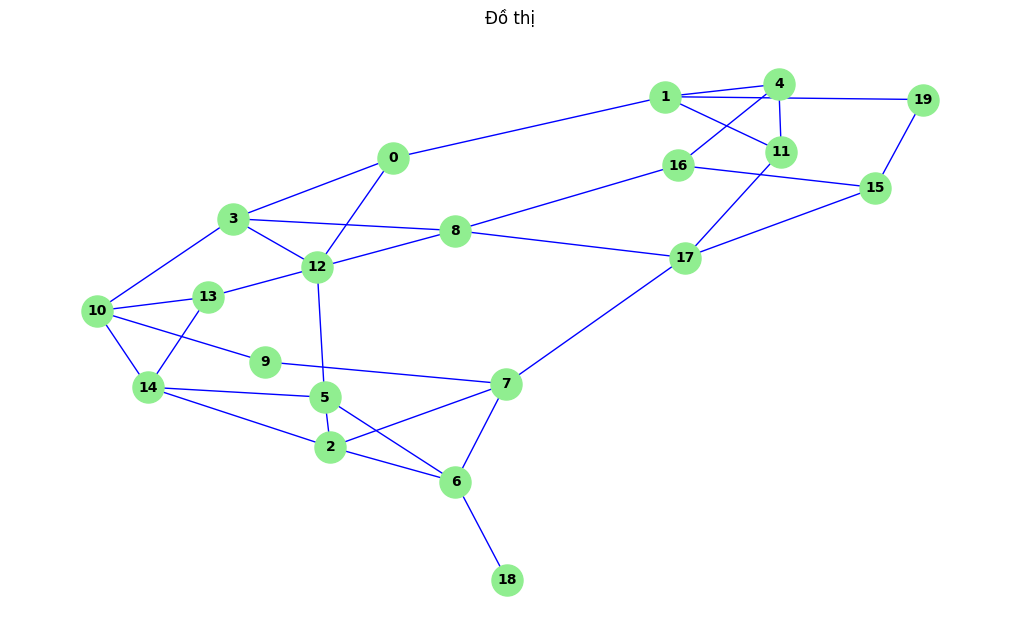

In [6]:
# Vẽ đồ thị 
G = nx.Graph()
for node, neighbors in graph_1.items():
    for neighbor in neighbors:
        G.add_edge(node, neighbor)

# Vẽ đồ thị
plt.figure(figsize=(10, 6))
pos = nx.spring_layout(G, seed=42)  # Bố trí các node
nx.draw(
    G, pos, with_labels=True, node_color='lightgreen',
    node_size=500, font_size=10, font_weight='bold', edge_color='blue'
)
plt.title("Đồ thị")
plt.show()

#### Nhập dữ liệu đầu vào cho thuật toán `UCS`

In [7]:
# Đọc file 'InputUCS.txt'
with open("InputUCS.txt", "r") as file_2:
    size_2, start_2, goal_2, matrix_2 = read_txt(file_2)
    file_2.close()
    graph_2 = convert_graph_weight(matrix_2)

In [8]:
graph_2

defaultdict(list,
            {0: [(2, 3), (14, 9)],
             1: [(3, 8), (12, 6), (19, 9)],
             2: [(4, 7)],
             3: [(4, 5), (15, 6)],
             4: [(1, 4), (5, 4)],
             5: [(10, 9), (19, 6)],
             6: [(11, 3)],
             7: [(8, 5)],
             8: [(0, 3), (15, 8)],
             9: [(12, 3)],
             10: [(4, 7), (18, 6)],
             11: [(2, 3), (5, 6)],
             12: [(9, 8), (13, 6)],
             13: [(1, 4), (12, 8)],
             14: [(3, 8)],
             15: [(2, 3), (6, 5)],
             16: [(18, 7)],
             17: [(7, 6)],
             18: [(5, 8)],
             19: [(15, 9), (17, 3)]})

## Thuật toán `Breadth-First Search` (BFS)

- **Node bắt đầu**: 19
- **Node đích**: 18

### Các bước thực hiện:
1. **Khởi tạo**: `L = [19]` (*trạng thái ban đầu*)
2. **Duyệt qua các đỉnh** theo thứ tự BFS:

| Bước | Node hiện tại | Danh sách `L` (Queue)                | Cập nhật `father`                  |
|------|---------------|--------------------------------------|------------------------------------|
| 1    | 19            | `[1, 15]`                            | `father[1, 15] = 19` |
| 2    | 1             | `[15, 0, 4, 11]`                     | `father[0, 4, 11] = 1` |
| 3    | 15            | `[0, 4, 11, 16, 17]`                 | `father[16, 17] = 15` |
| 4    | 0             | `[4, 11, 16, 17, 3, 12]`             | `father[3, 12] = 0` |
| 5    | 4             | `[11, 16, 17, 3, 12]`                | *Không cập nhật*                  |
| 6    | 11            | `[16, 17, 3, 12]`                    | *Không cập nhật*                  |
| 7    | 16            | `[17, 3, 12, 8, 15]`                 | `father[8, 15] = 16` |
| 8    | 17            | `[3, 12, 8, 15, 7]`                  | `father[7] = 17`                   |
| 9    | 3             | `[12, 8, 15, 7, 10]`                 | `father[10] = 3`                   |
| 10   | 12            | `[8, 15, 7, 10, 5]`                  | `father[5] = 12`                   |
| 11   | 8             | `[15, 7, 10, 5, 13]`                 | `father[13] = 8`                   |
| 12   | 15            | `[7, 10, 5, 13]`                     | *Không cập nhật*                  |
| 13   | 7             | `[10, 5, 13, 2, 6, 9]`               | `father[2, 6, 9] = 7` |
| 14   | 10            | `[5, 13, 2, 6, 9, 14]`               | `father[14] = 10`                  |
| 15   | 5             | `[13, 2, 6, 9, 14]`                  | *Không cập nhật*                  |
| 16   | 13            | `[2, 6, 9, 14]`                      | *Không cập nhật*                  |
| 17   | 2             | `[6, 9, 14]`                         | *Không cập nhật*                  |
| 18   | 6             | `[9, 14, 18]`                        | `father[18] = 6`                   |
| 19   | 9             | `[14, 18]`                           | *Không cập nhật*                  |
| 20   | 14            | `[18]`                               | *Không cập nhật*                  |
| 21   | 18            | *Trạng thái kết thúc*                | *Dừng*                            |

### Kết quả
Đường đi từ đỉnh 19 đến đỉnh 18 là:
`19 -> 15 -> 17 -> 7 -> 6 -> 18`

### Xây dựng thuật toán `Breadth-First Search`

In [9]:
def BFS(graph, start, end):
    visited = []
    frontier = Queue()

    # thêm node start vào frontier và visited
    frontier.put(start)
    visited.append(start)

    # start không có node cha
    parent = dict()
    parent[start] = None

    path_found = False

    while True:
        if frontier.empty():
            raise Exception("No way Exception")

        current_node = frontier.get()
        visited.append(current_node)

        # Kiểm tra current_node có là end hay không
        if current_node == end:
            path_found = True
            break

        for node in graph[current_node]:
            if node not in visited:
                frontier.put(node)
                parent[node] = current_node
                visited.append(node)
    
    # Xây dựng đường đi
    path = []
    if path_found:
        path.append(end)
        while parent[end] is not None:
            path.append(parent[end])
            end = parent[end]
        path.reverse()
    
    return path

#### Kết quả thuật toán `BFS` dựa theo `code` trên 

In [10]:
result_bfs = BFS(graph_1, start_1, goal_1)
print("Ket qua su dung thuat toan BFS:\n", result_bfs)

Ket qua su dung thuat toan BFS:
 [19, 15, 17, 7, 6, 18]


**Nhận xét**:
Cả lời giải bằng tay và bằng máy đều đều đưa ra kết quả chính xác và giống nhau (nếu thứ tự chọn node giống nhau).

## Thuật toán `Depth-First Search` (DFS)

- **Node bắt đầu**: 19
- **Node đích**: 18

### Các bước thực hiện:
1. **Khởi tạo**: `L = [19]` (*trạng thái ban đầu*)
2. **Duyệt qua các đỉnh** theo thứ tự DFS:

| Bước | Đỉnh hiện tại | Danh sách `L` (Stack)                | Cập nhật `father`                  |
|------|---------------|--------------------------------------|------------------------------------|
| 1    | 19            | `[1, 15]`                            | `father[1, 15] = 19` |
| 2    | 15            | `[1, 16, 17]`                        | `father[16, 17] = 15` |
| 3    | 17            | `[1, 16, 7, 8, 11]`                  | `father[7, 8, 11] = 17` |
| 4    | 11            | `[1, 16, 7, 8, 4]`                   | `father[4] = 11`                   |
| 5    | 4             | `[1, 16, 7, 8]`                      | *Không cập nhật*                  |
| 6    | 8             | `[1, 16, 7, 3, 13]`                  | `father[3, 13] = 8`  |
| 7    | 13            | `[1, 16, 7, 3, 10, 14]`              | `father[10, 14] = 13` |
| 8    | 14            | `[1, 16, 7, 3, 10, 2, 5]`            | `father[2, 5] = 14` |
| 9    | 5             | `[1, 16, 7, 3, 10, 2, 6, 12]`        | `father[6, 12] = 5` |
| 10   | 12            | `[1, 16, 7, 3, 10, 2, 6, 0]`         | `father[0] = 12`                  |
| 11   | 0             | `[1, 16, 7, 3, 10, 2, 6]`            | *Không cập nhật*                  |
| 12   | 6             | `[1, 16, 7, 3, 10, 2, 18]`           | `father[18] = 6`                   |
| 13   | 18            | *Trạng thái kết thúc*                | *Dừng*                            |

### Kết quả
Đường đi từ đỉnh 19 đến đỉnh 18 là:
`19 -> 15 -> 17 -> 8 -> 13 -> 14 -> 5 -> 6 -> 18`

### Xây dựng thuật toán `Depth-First Search`

In [11]:
def DFS(graph, start, end):
    visited = []
    frontier = []

    # thêm node start vào frontier và visited
    frontier.append(start)
    visited.append(start)

    # start không có node cha
    parent = dict()
    parent[start] = None

    path_found = False

    while True:
        if frontier == []:
            raise Exception("No way Exception")

        current_node = frontier.pop()
        visited.append(current_node)

        # Kiểm tra current_node có là end hay không
        if current_node == end:
            path_found = True
            break

        for node in graph[current_node]:
            if node not in visited:
                frontier.append(node)
                parent[node] = current_node
                visited.append(node)
        
    # Xây dựng đường đi
    path = []
    if path_found:
        path.append(end)
        while parent[end] is not None:
            path.append(parent[end])
            end = parent[end]
        path.reverse()
    
    return path

#### Kết quả thuật toán `DFS` dựa theo `code` trên 

In [12]:
result_dfs = DFS(graph_1, start_1, goal_1)
print("Ket qua su dung thuat toan DFS:\n", result_dfs)

Ket qua su dung thuat toan DFS:
 [19, 15, 17, 8, 13, 14, 5, 6, 18]


**Nhận xét**:
Cả lời giải bằng tay và bằng máy đều đều đưa ra kết quả chính xác và giống nhau (nếu thứ tự chọn node giống nhau).

# Thuật toán `Uniform-Cost Search` (UCS)

- **Node bắt đầu**: 16
- **Node đích**: 9

### Các bước thực hiện:
1. **Khởi tạo**: `PQ = {(16, 0)}`
2. **Duyệt qua các node** theo thứ tự UCS:

| Bước | Danh sách `PQ` (Priority Queue)                        |
|------|---------------------------------------------------------|
| 1    | `{(16, 0)}`                                             |
| 2    | `{(18, 7)}`                                             |
| 3    | `{(5, 15)}`                                             |
| 4    | `{(10, 24), (19, 21)}`                                  |
| 5    | `{(10, 24), (15, 30), (17, 24)}`                        |
| 6    | `{(4, 31), (15, 30), (17, 24)}`                         |
| 7    | `{(4, 31), (15, 30), (7, 30)}`                          |
| 8    | `{(4, 31), (2, 33), (6, 35), (7, 30)}`                  |
| 9    | `{(4, 31), (2, 33), (6, 35), (8, 35)}`                  |
| 10    | `{(1, 35), (2, 33), (6, 35), (8, 35)}`                  |
| 11   | `{(1, 35), (6, 35), (8, 35)}`                           |
| 12   | `{(3, 43), (12, 41), (19, 44), (6, 35), (8, 35)}`       |
| 13   | `{(3, 43), (12, 41), (19, 44), (11, 38), (0, 38)}`      |
| 14   | `{(3, 43), (12, 41), (19, 44), (14, 47)}`               |
| 15   | `{(3, 43), (9, 49), (13, 47), (19, 44), (14, 47)}`      |
| 16   | `{(9, 49), (13, 47), (19, 44), (14, 47)}`               |
| 17   | `{(9, 49), (13, 47), (14, 47)}`                         |
| 18   | `{(9, 49), (1, 51), (12, 55), (14, 47)}`                |
| 19   | `{(9, 49), (1, 51), (12, 55)}`                          |

### Kết quả
Node đích là **9** với trọng số nhỏ nhất (49) trong `PQ`, nên vòng lặp dừng.  
Đường đi ngắn nhất từ 16 đến 9 là:
`16 -> 18 -> 5 -> 10 -> 4 -> 1 -> 12 -> 9` với chi phí là **49**.

### Xây dựng thuật toán `Uniform-Cost Search`

In [13]:
def UCS(graph, start, end):
    visited = []
    frontier = PriorityQueue()

    frontier.put((0, start))
    visited.append(start)

    parent = dict()
    parent[start] = None
    path_found = False

    while True:
        if frontier.empty():
            raise Exception("No way Exception")
        
        current_w, current_node = frontier.get()
        visited.append(current_node)

        if current_node == end:
            path_found = True
            break

        for nodei in graph[current_node]:
            node, weight = nodei
            if node not in visited:
                frontier.put((current_w + weight, node))
                parent[node] = current_node
                visited.append(node)

    # Xây dựng đường đi
    path = []
    if path_found:
        path.append(end)
        while parent[end] is not None:
            path.append(parent[end])
            end = parent[end]
        path.reverse()
    
    return current_w, path        

#### Kết quả thuật toán `UCS` dựa theo `code` trên

In [14]:
cost, result_ucs = UCS(graph_2, start_2, goal_2)
print("Ket qua su dung thuat toan UCS:\n", result_ucs, "voi tong chi phi la", cost)

Ket qua su dung thuat toan UCS:
 [16, 18, 5, 10, 4, 1, 12, 9] voi tong chi phi la 49


**Nhận xét**:
Cả lời giải bằng tay và bằng máy đều đều đưa ra kết quả chính xác và giống nhau (nếu thứ tự chọn node giống nhau).